# Experiment 01: Influence of number of centers

In [1]:
%matplotlib inline

import os
import sys
import copy
import time
from array import array
import numpy as np
np.seterr(over='ignore')
import scipy as sp
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.interpolate import RegularGridInterpolator
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from ipywidgets import interact, interactive, fixed, FloatSlider

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

# VarClump functions
sys.path.append('../lib/')
from utils import *
from graph import *
from points_generation import *
from initial_guess import *
from variational import *
from gmr import *

## Loading data 2D

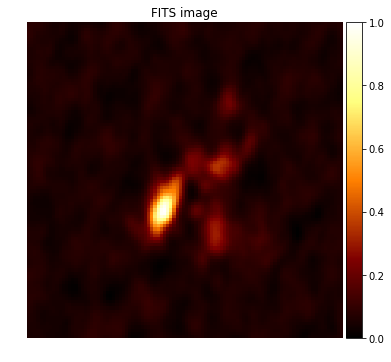

In [2]:
"""
Loading data
"""

fits_path = '../data/images/Orion.cont.image.fits'
x, y, data, dfunc = load_data(fits_path)
image_plot(data)

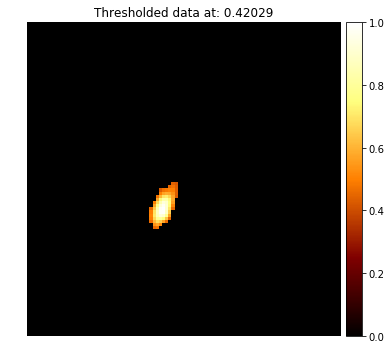

In [3]:
base_level = estimate_rms(data)
interact(thresholded_image_plot, data=fixed(data), level=FloatSlider(min=base_level,max=1.,step=0.01,value=base_level))

In [8]:
# common parameters
minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
maxsig = 30*minsig


elm_list = list()

for Nc in range(50, 801, 50):
    # number of points of each type
    Nb = 0
    Ne = 4*Nc-4*Nb
    
    # points generation
    center_points = random_centers_generation(data, Nc, base_level=base_level, power=5.)
    collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
    boundary_points = boundary_generation(Nb)
    
    # right format
    xc = center_points[:,0]
    yc = center_points[:,1]
    xe = collocation_points[:,0]
    ye = collocation_points[:,1]
    xb = boundary_points[:,0]
    yb = boundary_points[:,1]
    
#    # visualizing the choosen points
#    points_plot(data, center_points=center_points, title="Center Points")
#    points_plot(data, center_points=collocation_points, title="Collocation Points")


    ####################################
    # Initial parameters estimation
    ####################################
    #c0, sig0 = estimate_initial_guess(center_points, f, R=0.009, method='mean_dist')
    c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')
    #c0, sig0 = _estimate_initial_guess(dfunc, data, center_points, base_level)


#    solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
#    params_plot(c0, sig0, xc, yc)
#    params_distribution_plot(c0, sig0)
    elm_list.append(ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=1., lamb1=1., d1psi1=d1psi, 
                    d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1.))

##########################################################################################
Processing 50 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 20100.
nfev: 20115

Residual stats:
Residual RMS: 0.11033819368194818
Residual Variance: 0.0006511946235806206
Residual Entropy: 7.173434239287305
Total elapsed time: 5.123188018798828 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.22996770442763728
Mean min distance between collocation and center points: 0.05029708522562984

Homogeneity of solution:
Mean min distance in the (standarized) parameters space: 0.16144463699744363
Max min distance i

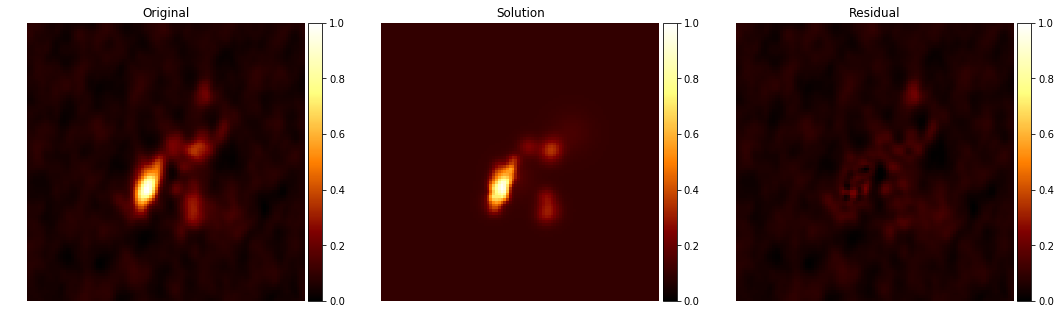

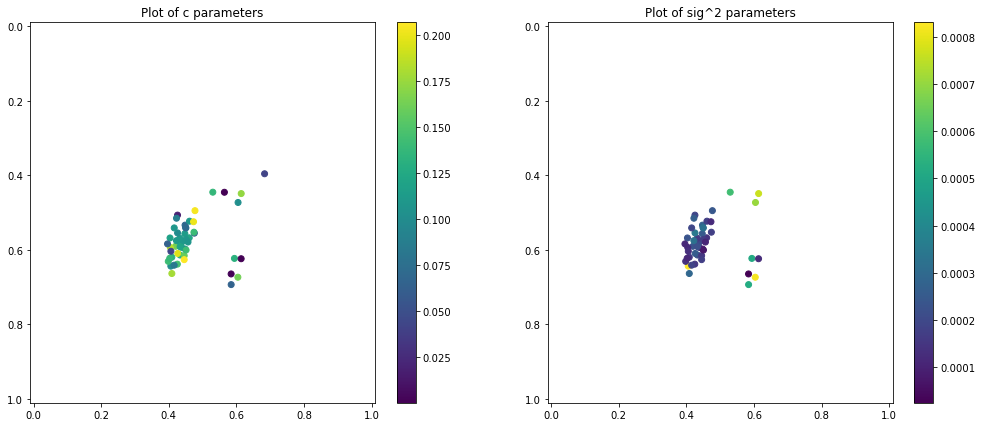

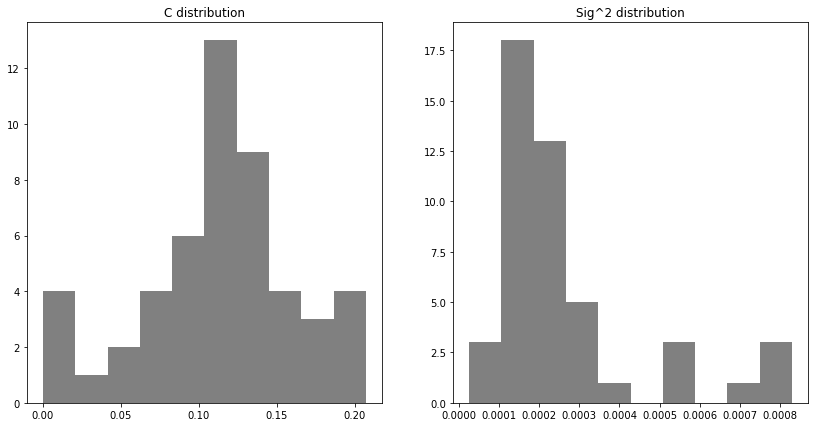

##########################################################################################
Processing 100 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 40100.
nfev: 40110

Residual stats:
Residual RMS: 0.10393794067719529
Residual Variance: 0.00016735096033082905
Residual Entropy: 7.059294793463514
Total elapsed time: 22.54943084716797 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2402369566634852
Mean min distance between collocation and center points: 0.03081355589230504

Homogeneity of solution:
Mean min distance in the (standarized) parameters space: 0.12043176313424185
Max min distance 

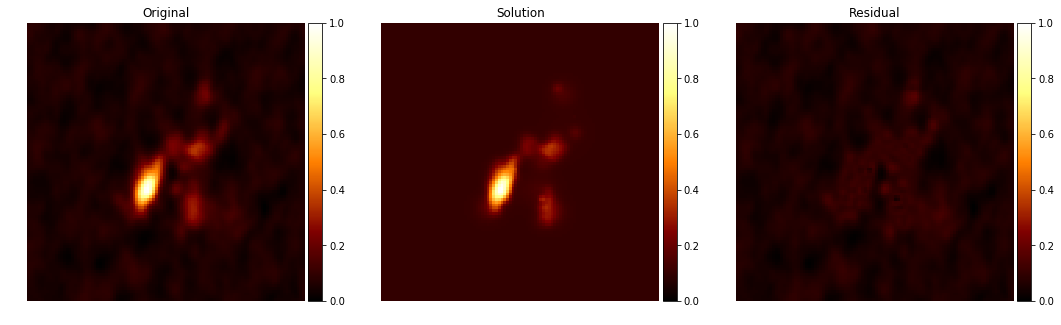

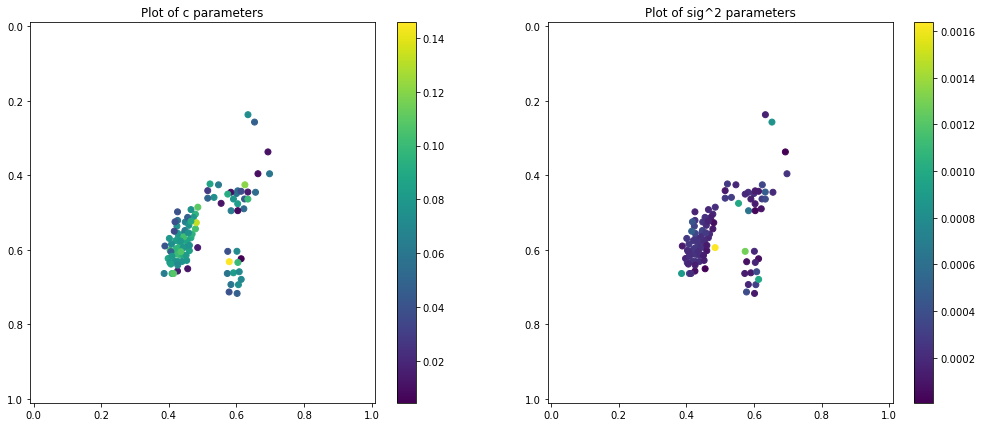

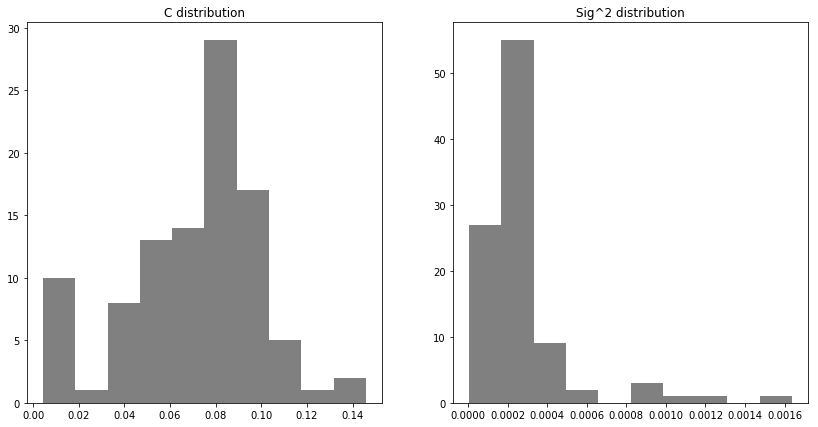

##########################################################################################
Processing 150 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 60100.
nfev: 60114

Residual stats:
Residual RMS: 0.10241907134511649
Residual Variance: 7.858835925309923e-05
Residual Entropy: 7.17306340929089
Total elapsed time: 62.61392045021057 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.1531551451914613
Mean min distance between collocation and center points: 0.023751931663346

Homogeneity of solution:
Mean min distance in the (standarized) parameters space: 0.08712290582776129
Max min distance in t

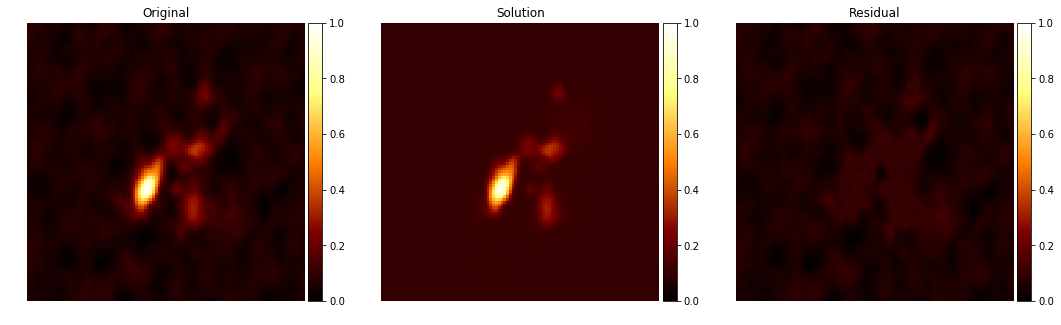

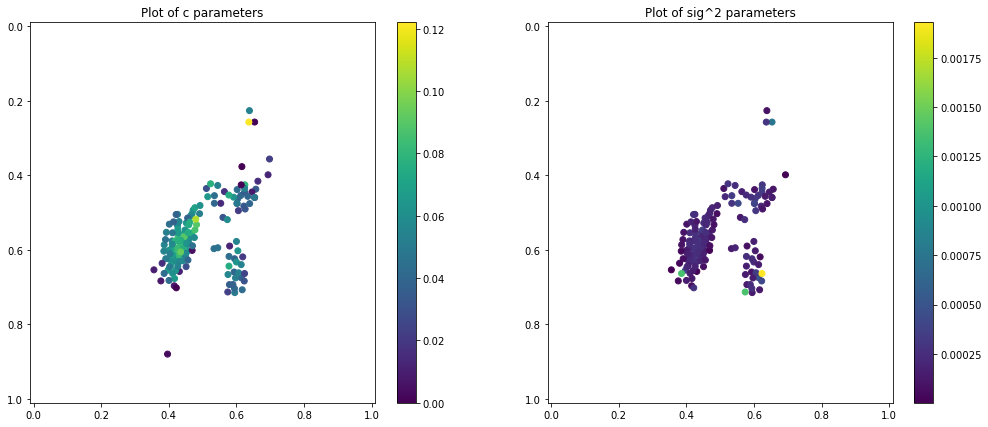

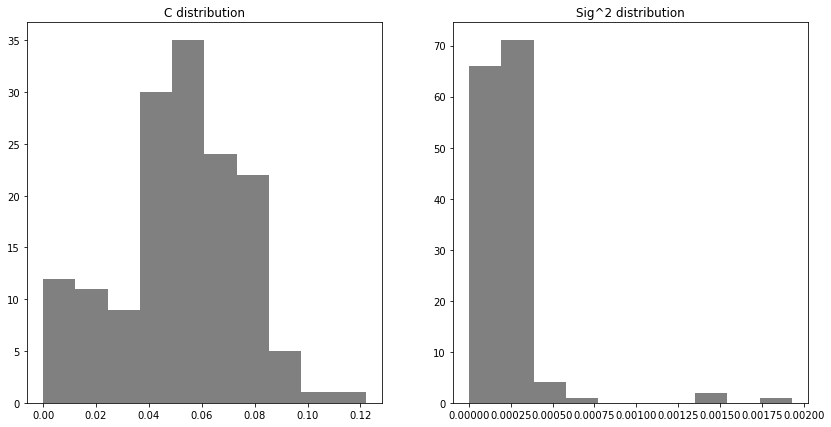

##########################################################################################
Processing 200 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 80100.
nfev: 80111

Residual stats:
Residual RMS: 0.1015033785738319
Residual Variance: 4.266526588768728e-05
Residual Entropy: 6.973949096382288
Total elapsed time: 131.73494863510132 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.09477407333913099
Mean min distance between collocation and center points: 0.015349024738164215

Homogeneity of solution:
Mean min distance in the (standarized) parameters space: 0.08268153377380479
Max min distance

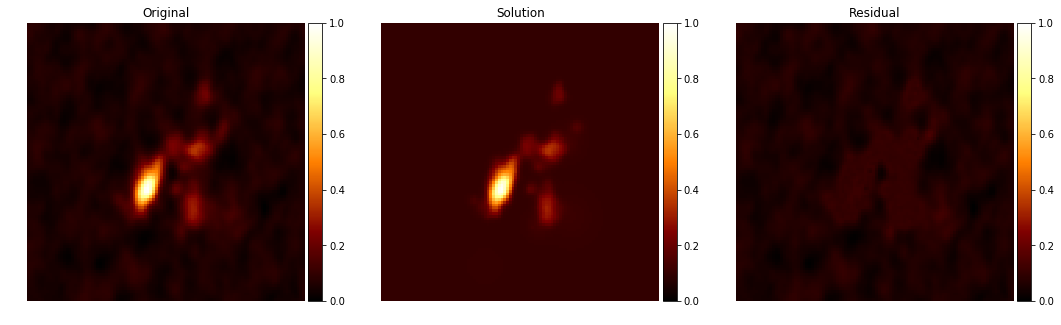

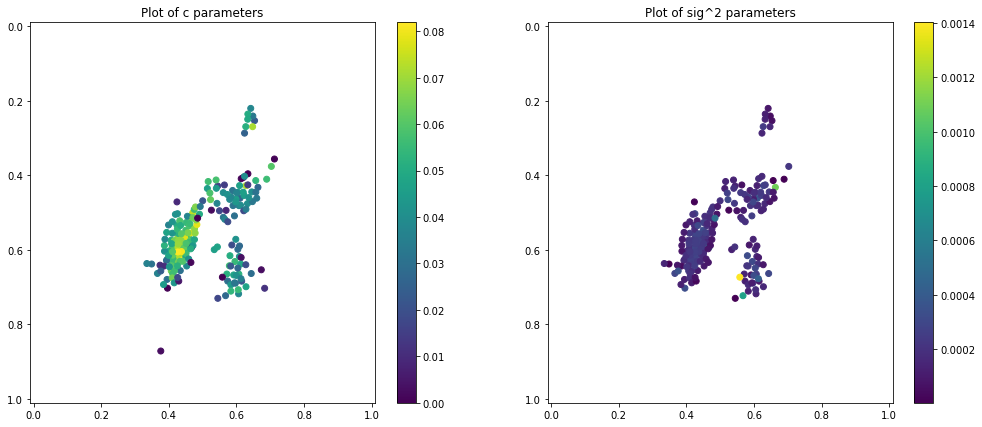

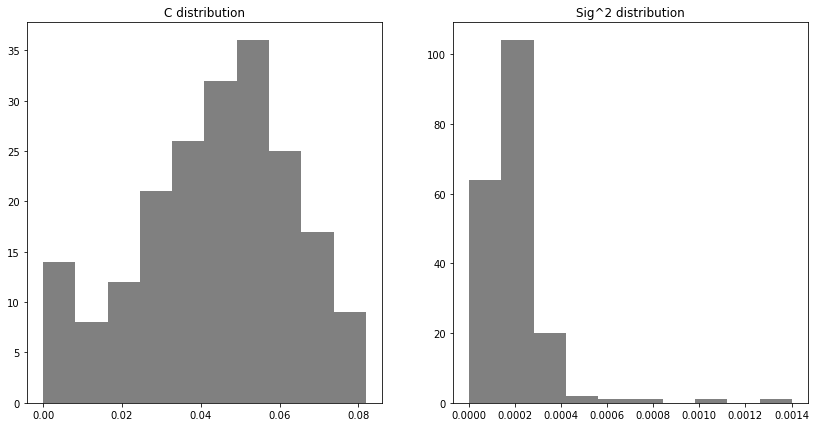

##########################################################################################
Processing 250 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100114

Residual stats:
Residual RMS: 0.10108389025671147
Residual Variance: 2.4738657192990836e-05
Residual Entropy: 7.136390719630938
Total elapsed time: 237.9091477394104 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.09486048060111064
Mean min distance between collocation and center points: 0.013672678306083515

Homogeneity of solution:
Mean min distance in the (standarized) parameters space: 0.0659196053645867
Max min distan

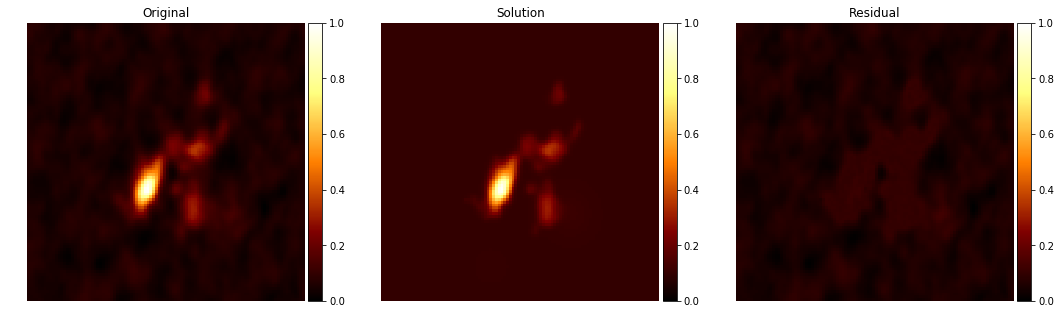

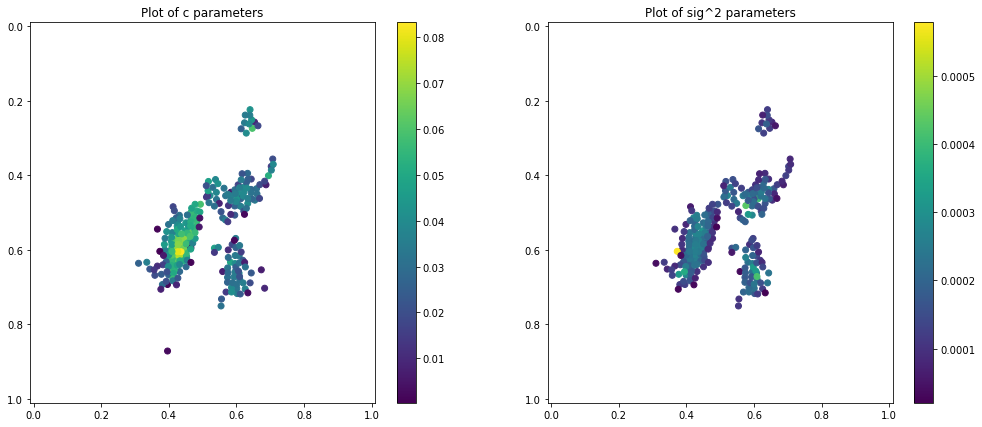

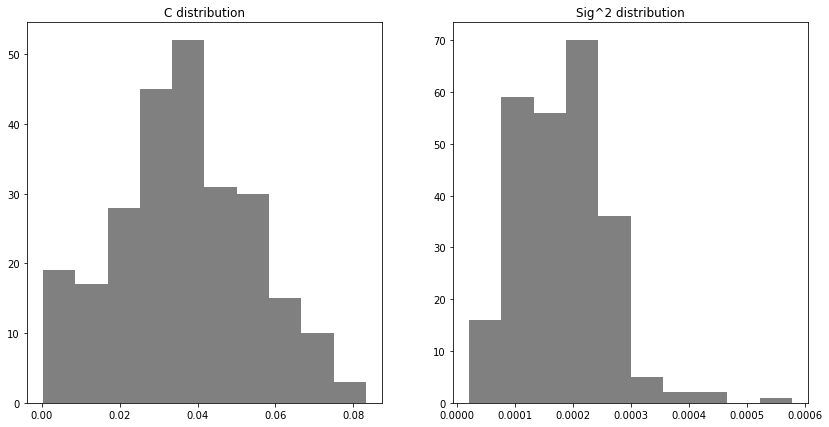

##########################################################################################
Processing 300 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120110

Residual stats:
Residual RMS: 0.1008836919705846
Residual Variance: 1.635552828388168e-05
Residual Entropy: 7.296531594123536
Total elapsed time: 380.1025264263153 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06507243028739279
Mean min distance between collocation and center points: 0.010248769500448462

Homogeneity of solution:
Mean min distance in the (standarized) parameters space: 0.06128964769030659
Max min distanc

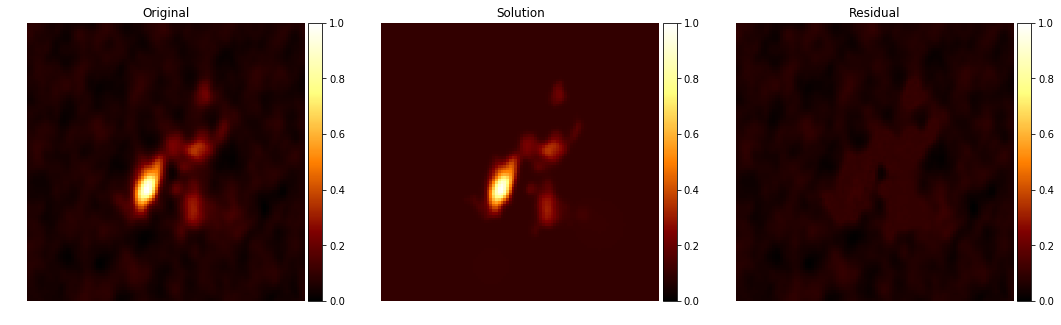

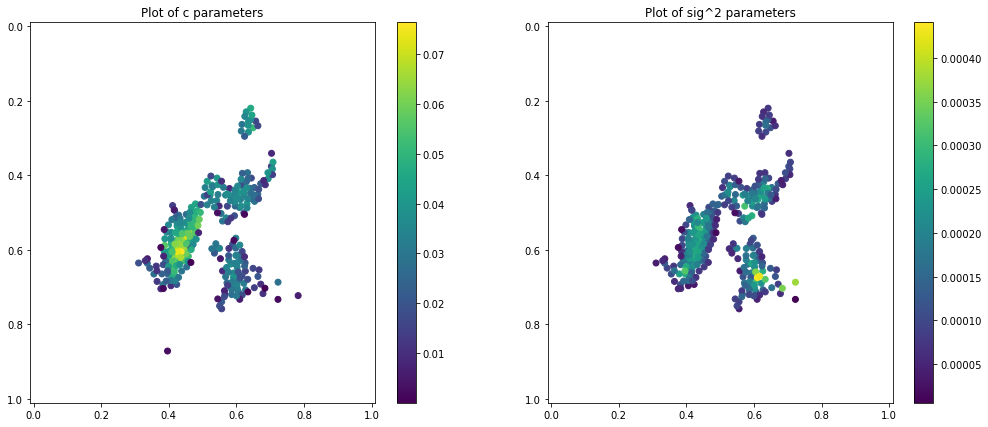

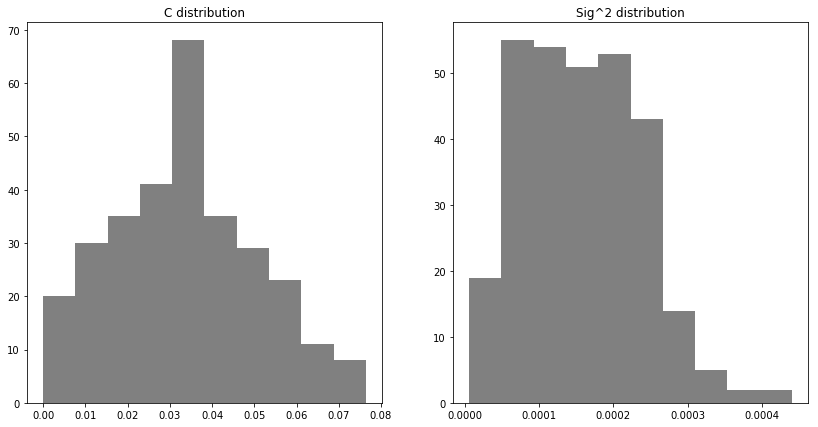

##########################################################################################
Processing 350 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 140100.
nfev: 140107

Residual stats:
Residual RMS: 0.10081908619276557
Residual Variance: 1.4704664170935821e-05
Residual Entropy: 6.9572081189677695
Total elapsed time: 567.8128468990326 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.032350446230035565
Mean min distance between collocation and center points: 0.008175772523458443

Homogeneity of solution:
Mean min distance in the (standarized) parameters space: 0.05581463165928173
Max min dis

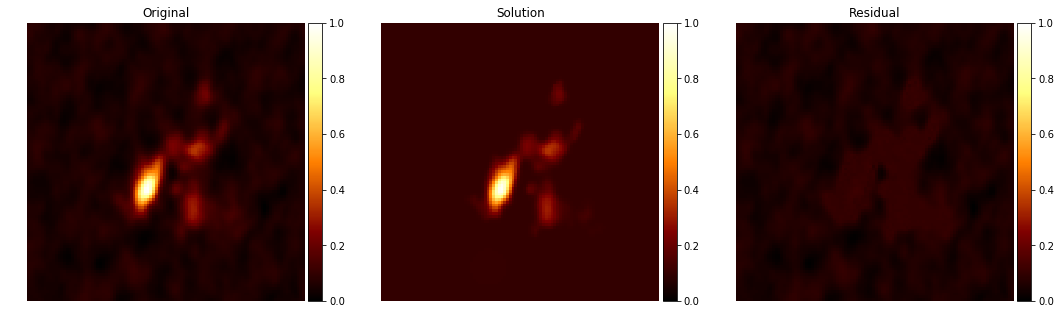

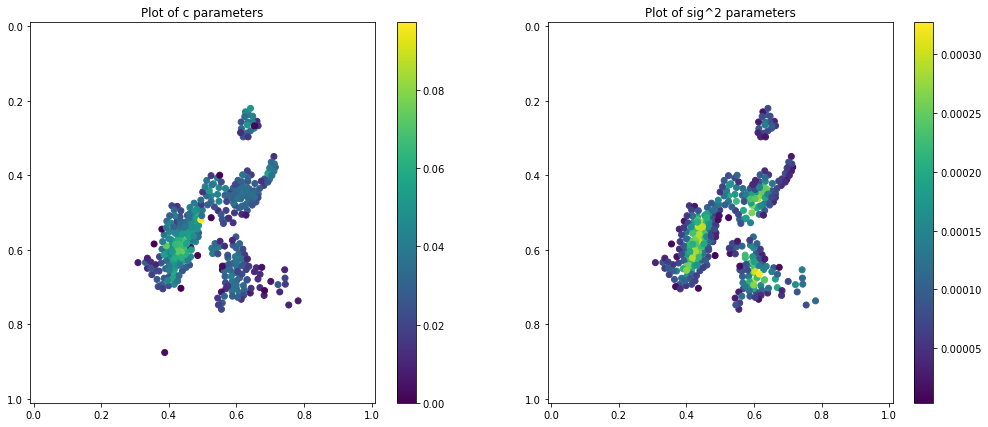

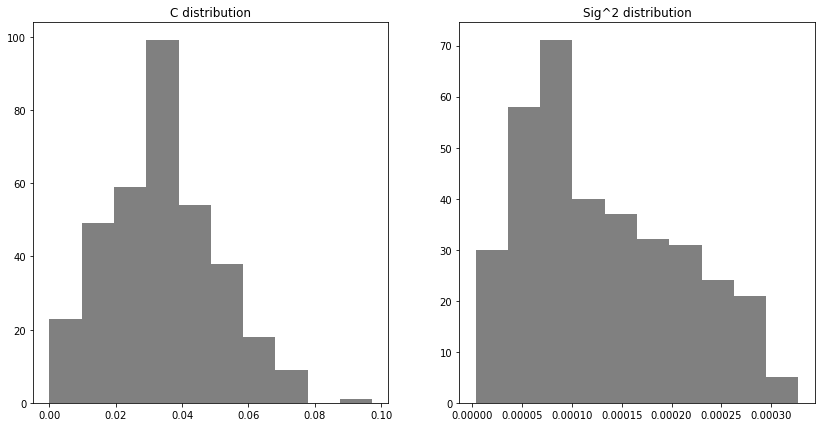

##########################################################################################
Processing 400 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 160100.
nfev: 160113

Residual stats:
Residual RMS: 0.1008887417799429
Residual Variance: 1.4207192238081336e-05
Residual Entropy: 6.82394111277524
Total elapsed time: 820.9343283176422 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03137259295289693
Mean min distance between collocation and center points: 0.0074662182640377025

Homogeneity of solution:
Mean min distance in the (standarized) parameters space: 0.055680779976132834
Max min dista

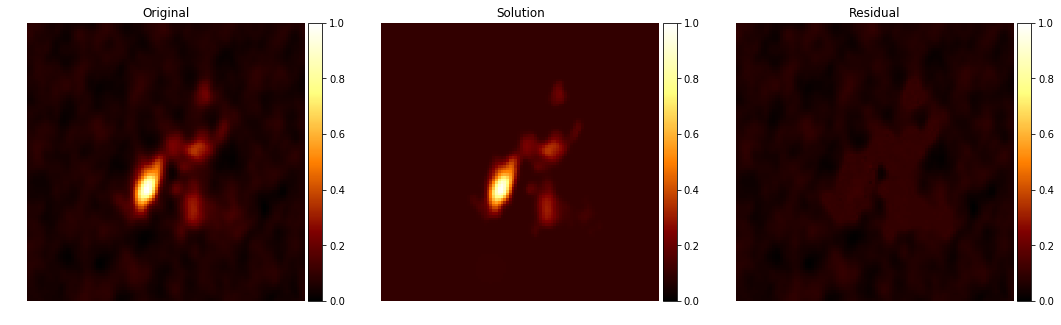

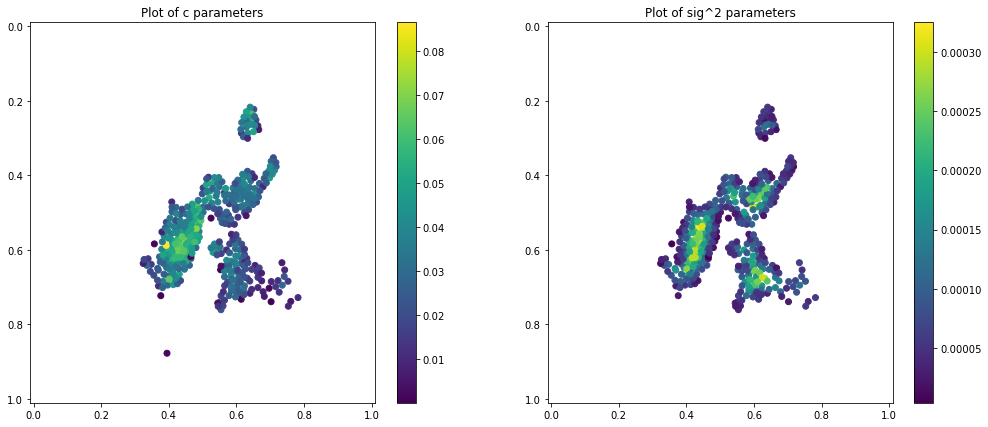

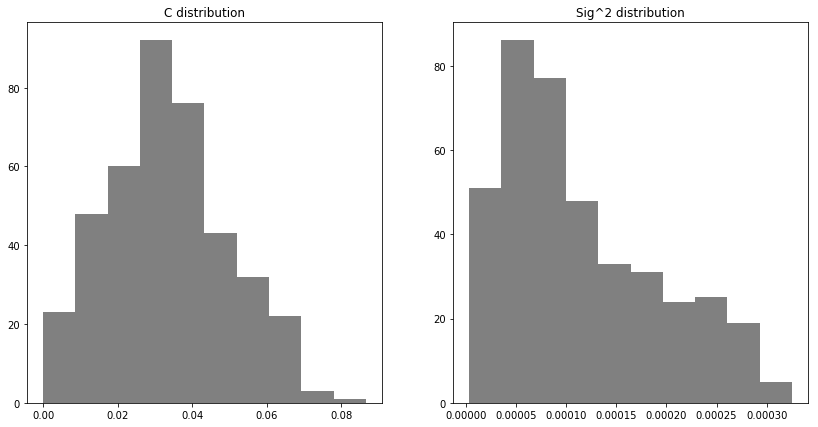

##########################################################################################
Processing 450 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 180100.
nfev: 180124

Residual stats:
Residual RMS: 0.10093038598745213
Residual Variance: 1.3089344371373302e-05
Residual Entropy: 6.99134150267309
Total elapsed time: 1208.4878523349762 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.020485450494371633
Mean min distance between collocation and center points: 0.006780313149598797

Homogeneity of solution:
Mean min distance in the (standarized) parameters space: 0.07118775163114027
Max min dist

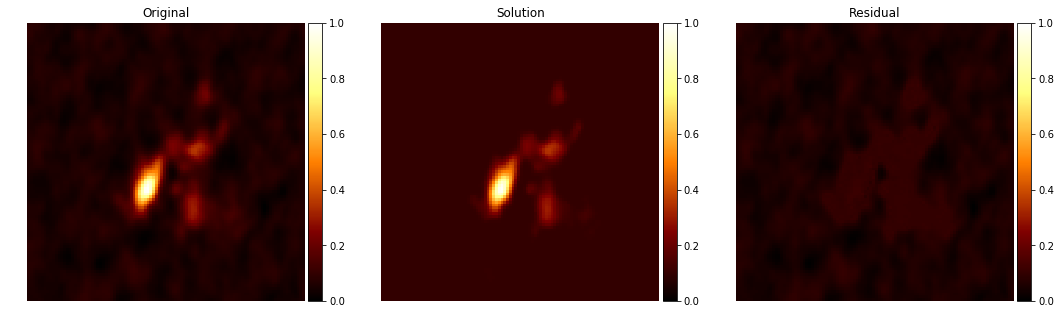

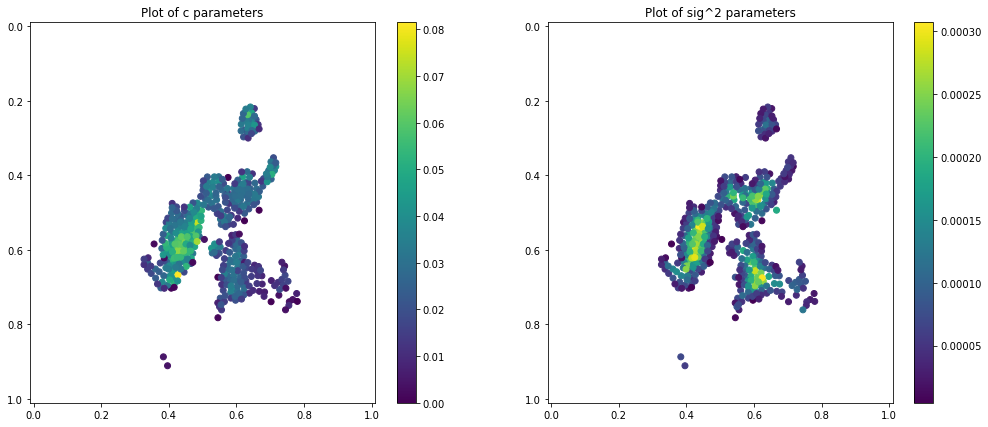

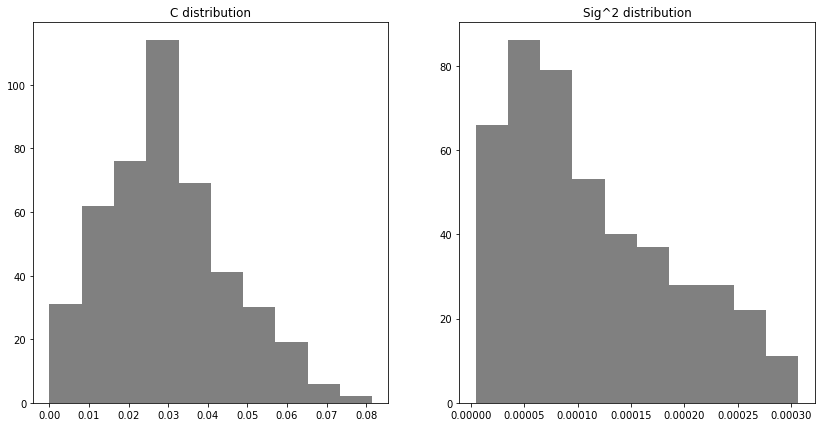

##########################################################################################
Processing 500 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 200100.
nfev: 200107

Residual stats:
Residual RMS: 0.10092031098374618
Residual Variance: 1.235406068008914e-05
Residual Entropy: 6.9633685071328255
Total elapsed time: 1527.1567549705505 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.021275849436996442
Mean min distance between collocation and center points: 0.0065179947561043615

Homogeneity of solution:
Mean min distance in the (standarized) parameters space: 0.07018663051572642
Max min di

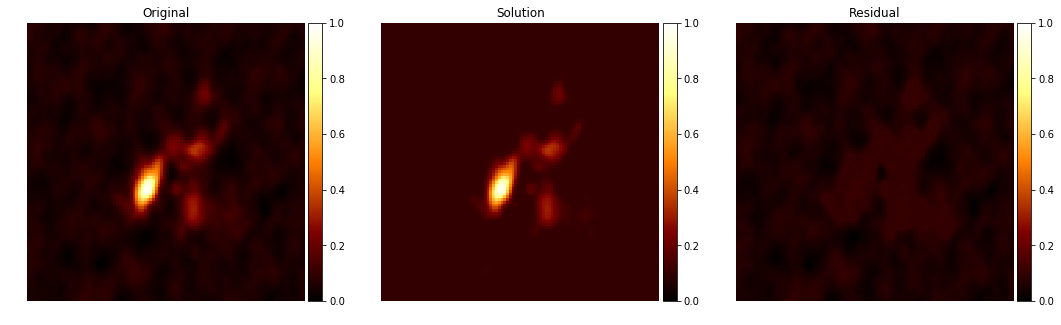

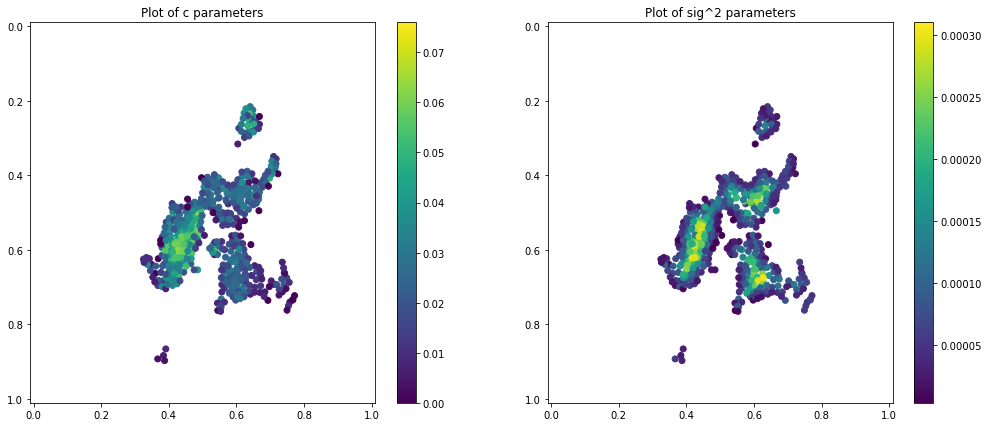

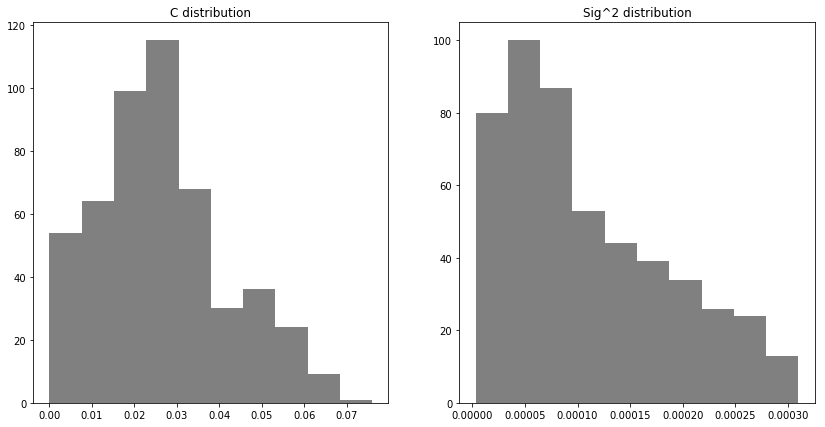

##########################################################################################
Processing 550 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 220100.
nfev: 220114

Residual stats:
Residual RMS: 0.10089646082290246
Residual Variance: 1.3195169108943342e-05
Residual Entropy: 6.812035226768282
Total elapsed time: 2141.2849400043488 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.019749788579666333
Mean min distance between collocation and center points: 0.006165153914312284

Homogeneity of solution:
Mean min distance in the (standarized) parameters space: 0.07164206331481268
Max min dis

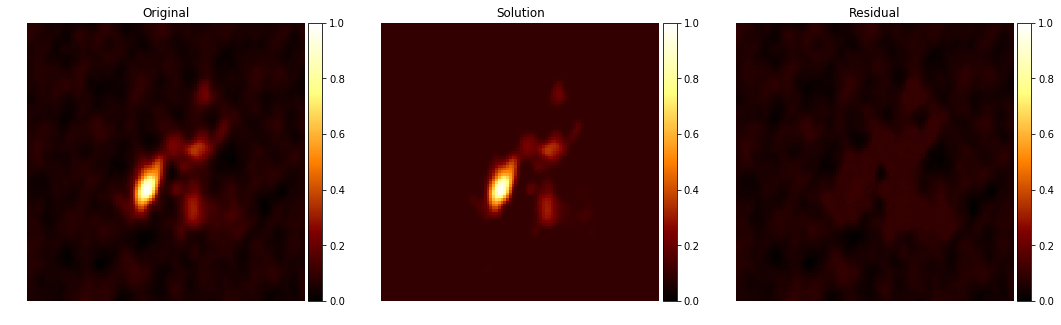

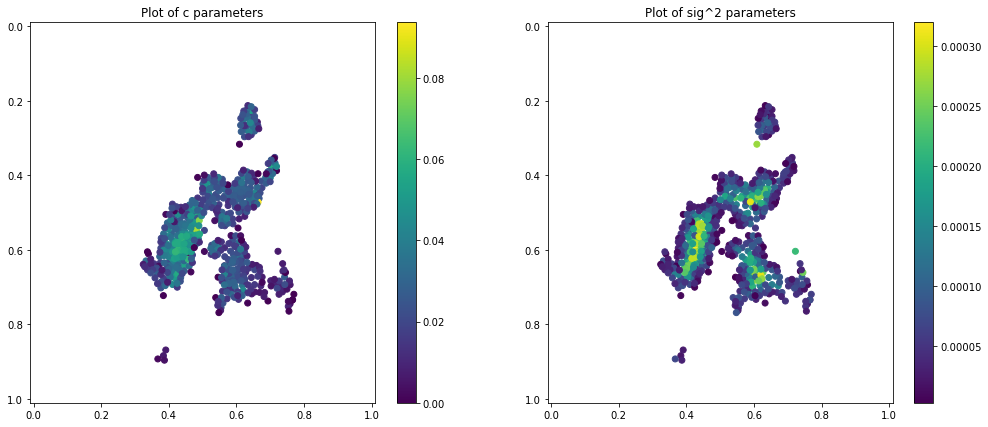

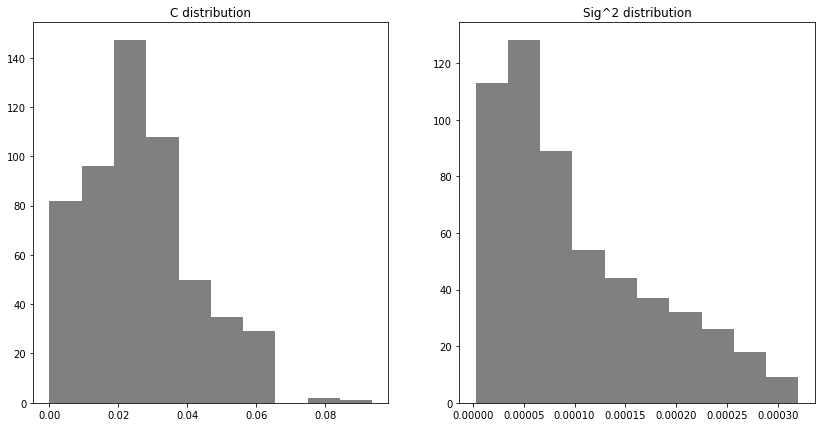

##########################################################################################
Processing 600 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 240100.
nfev: 240114

Residual stats:
Residual RMS: 0.10088728286263857
Residual Variance: 1.2233098572366703e-05
Residual Entropy: 6.839812668988853
Total elapsed time: 2741.035938501358 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.01926304523044282
Mean min distance between collocation and center points: 0.0059120599205931

Homogeneity of solution:
Mean min distance in the (standarized) parameters space: 0.05893744445930231
Max min distanc

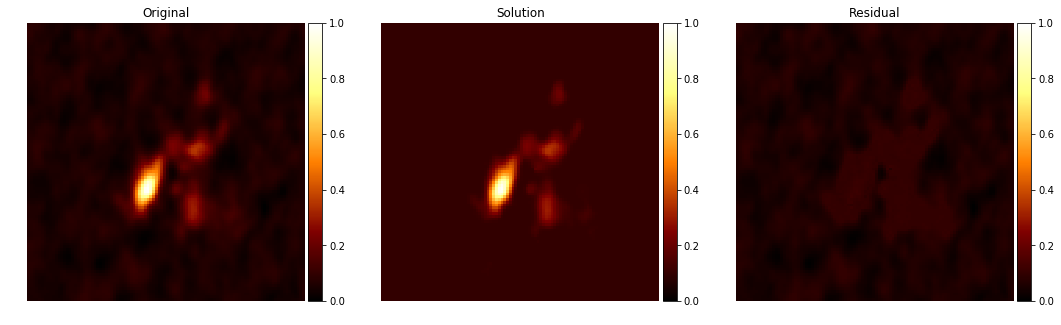

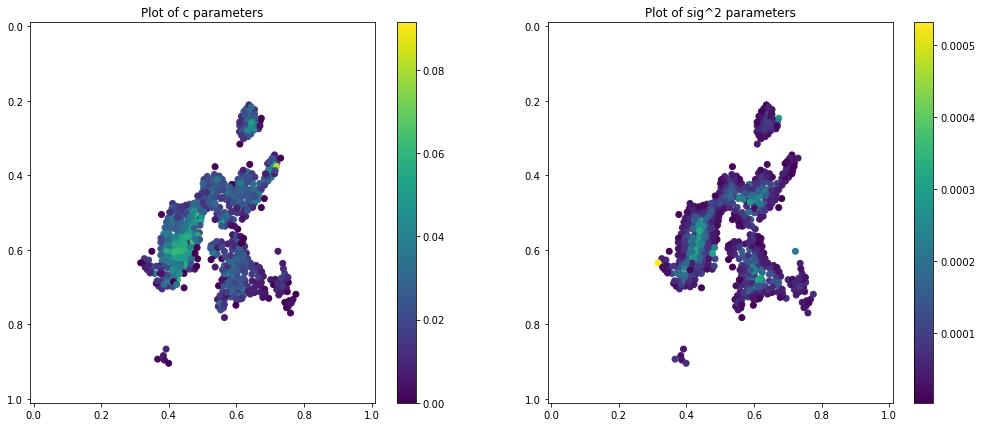

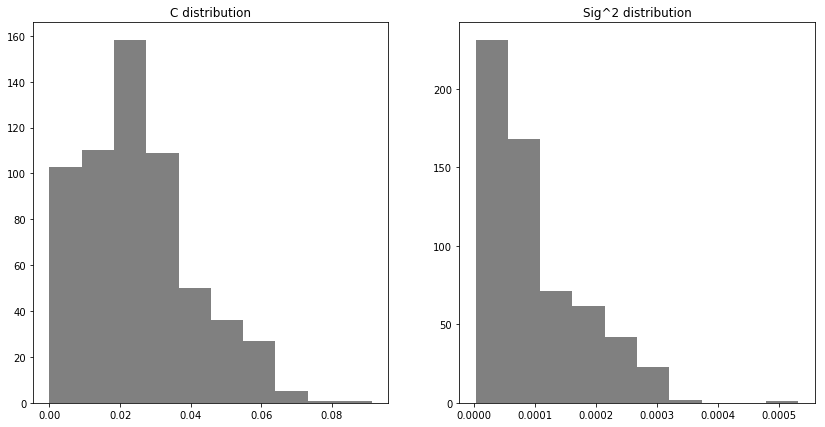

##########################################################################################
Processing 650 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 260100.
nfev: 260116

Residual stats:
Residual RMS: 0.10094428252244335
Residual Variance: 1.1630482767671202e-05
Residual Entropy: 7.080264189673347
Total elapsed time: 3482.2569477558136 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.01713968025387606
Mean min distance between collocation and center points: 0.005583239827757094

Homogeneity of solution:
Mean min distance in the (standarized) parameters space: 0.05387795992760878
Max min dist

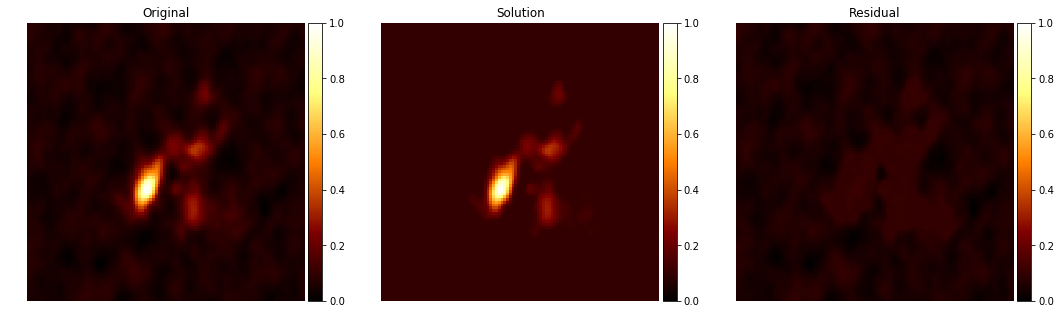

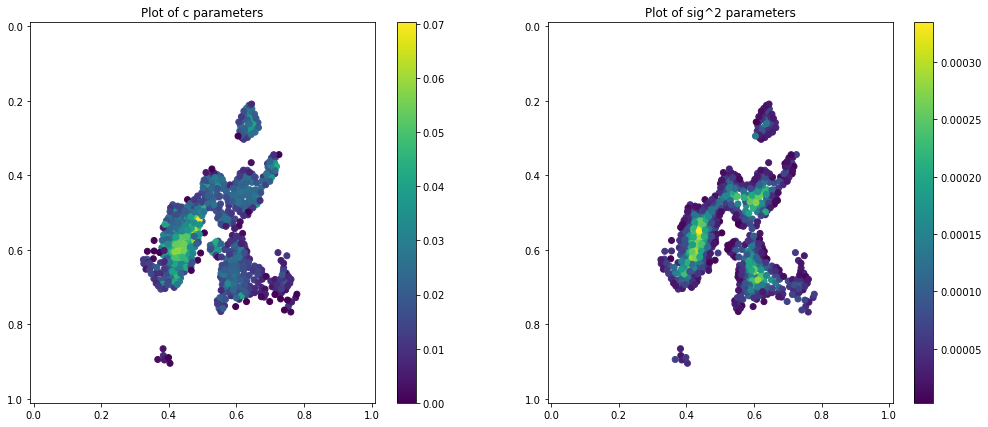

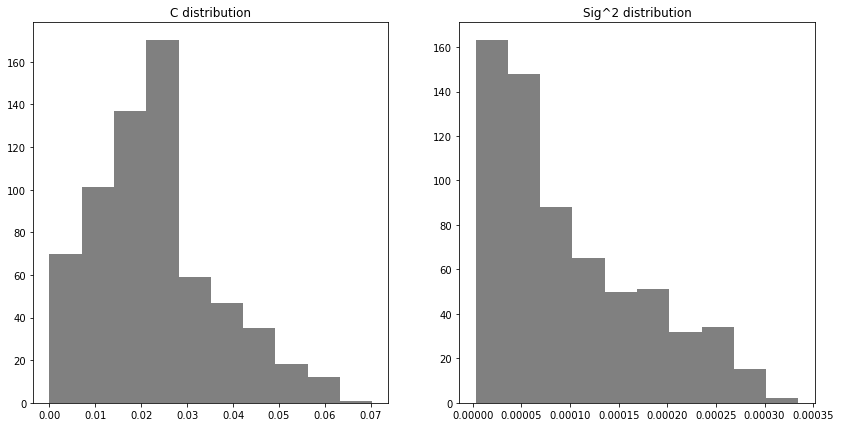

##########################################################################################
Processing 700 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 280100.
nfev: 280109

Residual stats:
Residual RMS: 0.10092881506756882
Residual Variance: 1.309291144679151e-05
Residual Entropy: 6.5971528012887015
Total elapsed time: 4123.196964979172 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.017244624624875533
Mean min distance between collocation and center points: 0.005252047607999565

Homogeneity of solution:
Mean min distance in the (standarized) parameters space: 0.05566204132748575
Max min dist

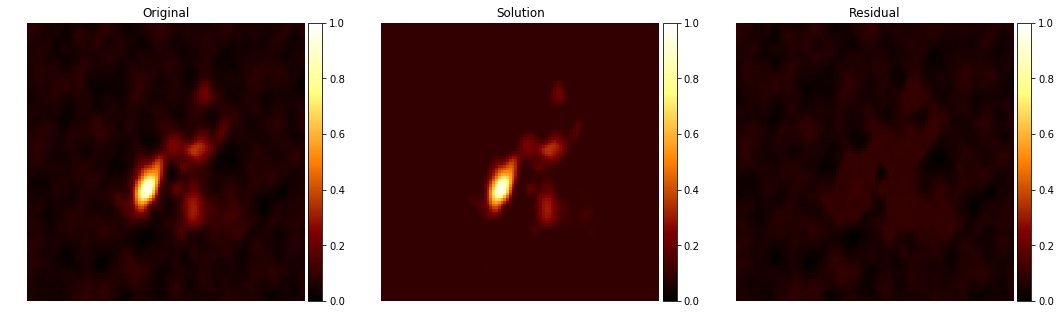

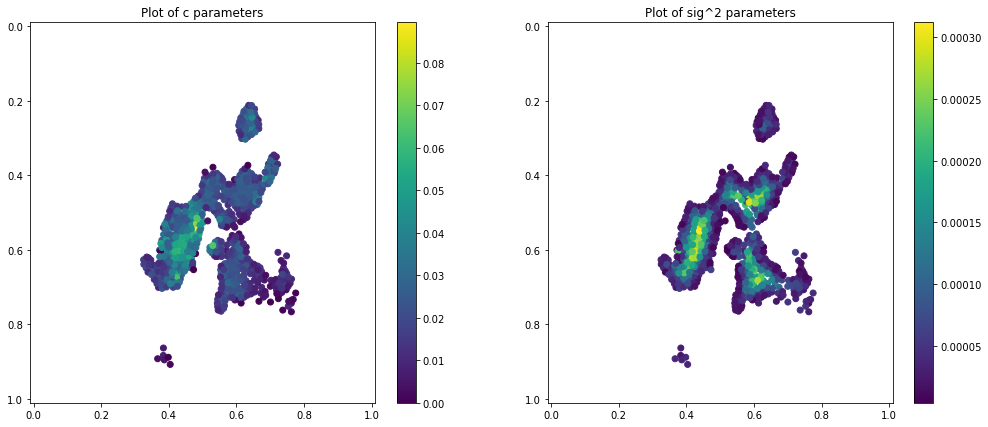

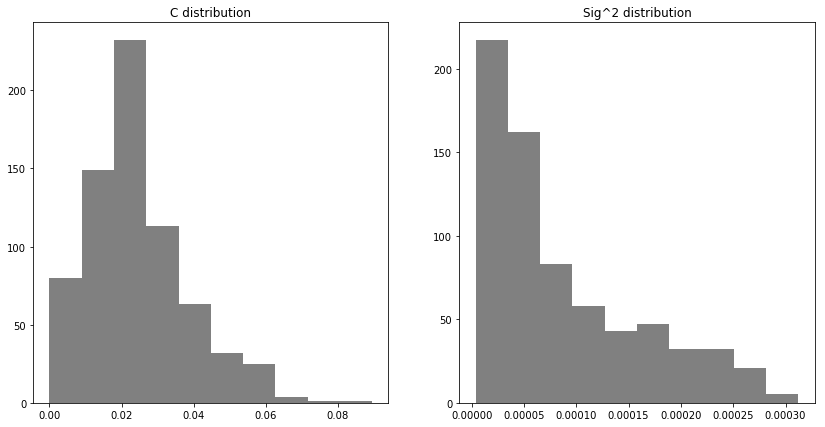

##########################################################################################
Processing 750 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 300100.
nfev: 300112

Residual stats:
Residual RMS: 0.10097354977035707
Residual Variance: 1.067405427013758e-05
Residual Entropy: 7.072532402740524
Total elapsed time: 5126.837056159973 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.017983289561043593
Mean min distance between collocation and center points: 0.005070292796325475

Homogeneity of solution:
Mean min distance in the (standarized) parameters space: 0.05456117815740497
Max min dista

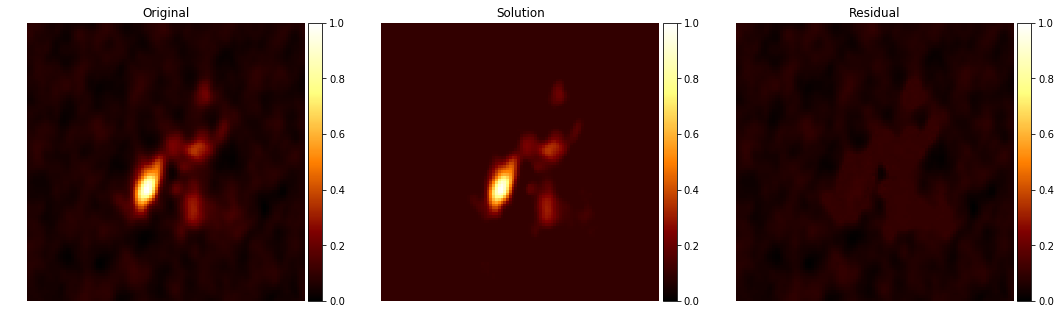

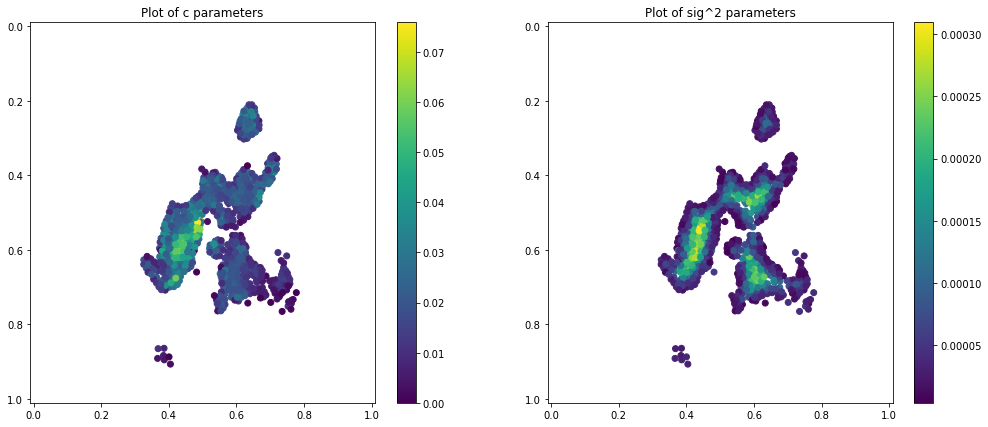

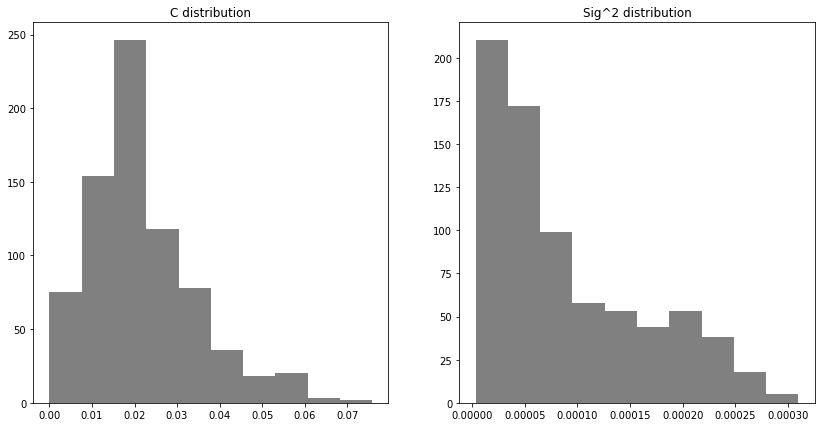

##########################################################################################
Processing 800 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 320100.
nfev: 320112

Residual stats:
Residual RMS: 0.10092443549279499
Residual Variance: 1.087284493996434e-05
Residual Entropy: 6.8428445408200815
Total elapsed time: 6130.70089673996 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.01593636637589772
Mean min distance between collocation and center points: 0.0049440379151444655

Homogeneity of solution:
Mean min distance in the (standarized) parameters space: 0.04790991563644578
Max min dista

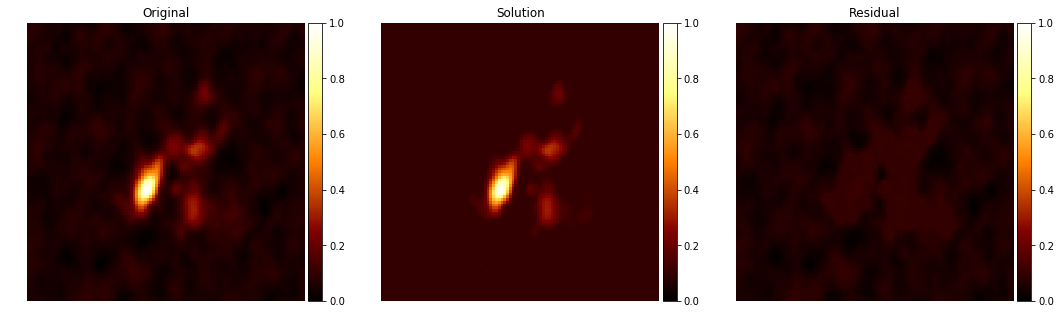

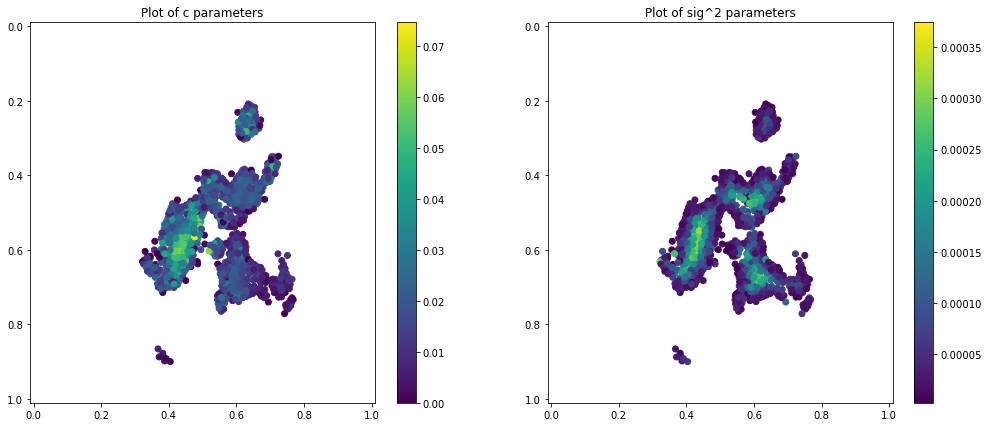

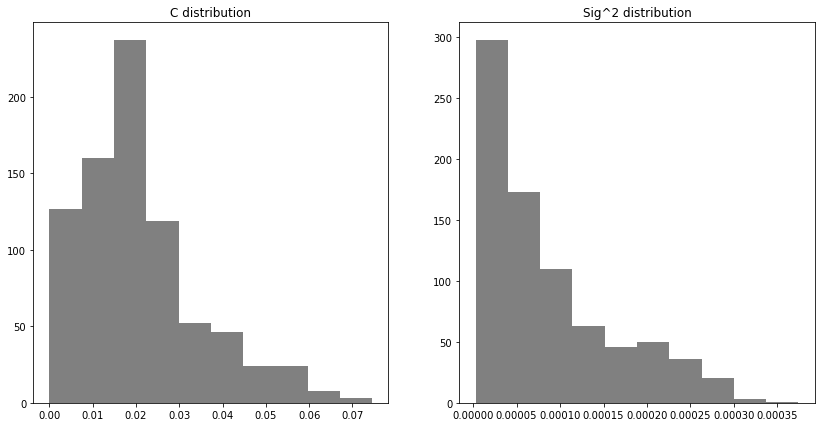

In [9]:
for elm in elm_list:
    print('#'*90)
    print('Processing {0} centers example'.format(len(elm.c)))
    print('#'*90 + '\n')

    nfev = 100*(len(elm.get_params())+1)
    elm_solver(elm, method='standard', max_nfev=nfev)